In [1]:
import geopandas as gpd

print("GeoPandas successfully imported. yessirrr!")

GeoPandas successfully imported. yessirrr!


In [4]:
#loading in a sample world map
import geopandas as gpd
import geodatasets

world = gpd.read_file(geodatasets.get_path('naturalearth.land'))

world.head()

,featurecla,scalerank,min_zoom,geometry
0,Land,1,1.0,"POLYGON ((-59.57209 -80.04018, -59.86585 -80.5..."
1,Land,1,1.0,"POLYGON ((-159.20818 -79.49706, -161.1276 -79...."
2,Land,1,0.0,"POLYGON ((-45.15476 -78.04707, -43.92083 -78.4..."
3,Land,1,1.0,"POLYGON ((-121.21151 -73.50099, -119.91885 -73..."
4,Land,1,1.0,"POLYGON ((-125.55957 -73.48135, -124.03188 -73..."


<Axes: >

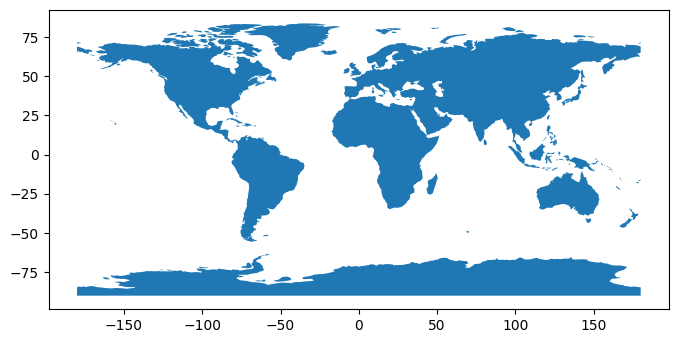

In [6]:
world.plot(figsize=(8,6))